December 15, 2017

University of Montana                                      

Master of Science in Business Analytics

BMIS-694-Text Mining of Unstructured Data

Project Assignment 

# Naive Bayes Classification of Tweets from Two Magazines
Objective: To classify common words and sentences to each magazine. 

## About the Magazines

In this project for BMKT 670 Applied Data Analytics, I pulled tweets from two magazines' using Twitter API handles. Those magizines are: Africa Science News and Society for Science. Africa Science News is Africa's leading website for science for development, health and environment based in Nairobi, Kenya ([@Afriscience](http://africasciencenews.org/) ) while and Society for Science is a US based non-profit membership organization dedicated to the public engagement in scientific research and education. ([@Society4Science](https://www.societyforscience.org/)).

In [1]:
import nltk
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [2]:
#Storing the AfriScience data at a text called text one which will be used in the sections below. 

import nltk
f1=open('./20171125_Afriscience_followers.txt', 'r')
raw1=f1.read()
tokens1 = nltk.word_tokenize(raw1)
text1 = nltk.Text(tokens1)

f2=open('./20171125_Society4Science_followers.txt', 'r')
raw2=f2.read()
tokens2 = nltk.word_tokenize(raw2)
text2 = nltk.Text(tokens2)

In [3]:
text1 #Reads the first row of the file, AfriScience

<Text: screen_name name id location followers_count friends_count description Afriscience...>

In [4]:
text2 #Reads the first row of the file, Society for Science

<Text: screen_name name id location followers_count friends_count description Society4Science...>

In [5]:
from nltk.corpus import PlaintextCorpusReader

# RegEx or list of file names
path = ".\\API-Twitter\\"
files = ".*\.txt"

corpus0 = PlaintextCorpusReader(path, files)
corpus1  = nltk.Text(corpus0.words())
corpus2  = nltk.Text(corpus0.words())

## Data Preparation
Using the natural language tool kit (NLTK) package, the next step is to prepare the data into a readable. The function format_sentence transforms each tweet into words and compiles them into a dictionary. Those words are recorded as TRUE booleans. [source](https://www.twilio.com/blog/2017/09/sentiment-analysis-python-messy-data-nltk.html) .

In [68]:
import nltk

def format_sentence(sent):
    return({word: True for word in nltk.word_tokenize(sent)})

#The first sentence in the Africa Science twitter downloaded textfile data.
print(format_sentence("Africa s leading website for science for development, health and environment"))

{'Africa': True, 's': True, 'leading': True, 'website': True, 'for': True, 'science': True, 'development': True, ',': True, 'health': True, 'and': True, 'environment': True}


In [69]:
#So the description is in the 7th column of the data
description_list = []
with open("./20171125_Afriscience_followers.txt") as f:
    for i in f:                                      #this is the list of the columns
        i = i.strip().split("\t")                    #Split on a tab cause the text is separted with tabs
        if len(i) > 6:
            descrip = i[6]                           #Choose the 7th column of the text file, which is the description
            description_list.append((descrip,"Afri"))#Add the description column from the Africa Science 
                                                     #file to the dictionary description list.
            
with open("./20171125_Society4Science_followers.txt") as f:
    for i in f: 
        i = i.strip().split("\t")
        if len(i) > 6:
            descrip = i[6]
            description_list.append((descrip,"USA")) #Add the description column from the Society for Science 
                                                     #file to the dictionary description list.

## Building Labels for the datasets
In the following codes, I wrote a function for the labels 

In [154]:
def desc_features(word):
    return {'science': word[-1]}
desc_features('annoying')

{'science': 'g'}

In [ ]:
def desc_features(desc):
    return{ 'science', 
            'agriculture',
            'programe',
            'education',
            'poor',
            'rain',
            'soil',
            'organic',
            'church',
            'program'
            'process',
            'research',
            'stem',
            'God',
            'fearing'
            'football'
            }
desc_features('Science')

In [127]:
#define words features in the magazines. Use the list of words I saved in the text files for each magazine here
def desc_features(word):
    
    word = desc.strip("\n").split()
    
    #print(desc)
    word = "science agriculture programme education poor rain soil organic church program process research stem Gid fearing football"
    ret_dict = {'environmental':word[-3],
                'science':word[-1],
                }
    
    return(ret_dict)

In [155]:
print(word)

~I m walking toward my future, but tripping over my own feet~~Aspiring Archaeologist~~BNTH@W Senior 2017~~The University of Texas at Austin class of 2021~


In [156]:
# lower cases all words. 
import re
def desc_features(desc):
    split_desc = desc.split(" ")
    lower_desc = [row.lower() for row in split_desc]
    lower_desc = [re.sub(r'[^\w\s]','',word) for word in lower_desc]
    # To check for the length of words
    if  len(lower_desc) > 20:
        longd = True
    else: 
        longd = False
    ret_val = {"LONG":longd}
    for word in lower_desc:
        ret_val[word] = True
    return(ret_val)

In [157]:
import random
random.shuffle(description_list)

In [158]:
test_size = 3000
devtest_size = 6000

featuresets = [(format_sentence(n), name) for (n, name) in description_list]
train_set, test_set = featuresets[3000:], featuresets[:3000]
devtest_names = description_list[test_size:(test_size + devtest_size)]
classifier = nltk.NaiveBayesClassifier.train(train_set)

In [159]:
#Building a classifier 
from nltk.classify import NaiveBayesClassifier

classifier = NaiveBayesClassifier.train(train_set)

In [160]:
#The most informative words. I don't know some of the words. 
classifier.show_most_informative_features(50) #print 50 most informative words

Most Informative Features
                  Comedy = True             Afri : USA    =    190.9 : 1.0
                  l'khbr = True             Afri : USA    =    120.2 : 1.0
               ltknwlwjy = True             Afri : USA    =    100.7 : 1.0
             Journalists = True             Afri : USA    =     85.2 : 1.0
                   wldyn = True             Afri : USA    =     55.8 : 1.0
                   Sains = True             Afri : USA    =     54.6 : 1.0
                  Movies = True             Afri : USA    =     51.0 : 1.0
                   'khbr = True             Afri : USA    =     50.0 : 1.0
                      kr = True             Afri : USA    =     50.0 : 1.0
           Entertainment = True             Afri : USA    =     45.1 : 1.0
                  wlthqf = True             Afri : USA    =     44.3 : 1.0
                   Anime = True             Afri : USA    =     43.7 : 1.0
                  Africa = True             Afri : USA    =     36.9 : 1.0

## Interpretation of the Most Informative Features
The word comedy is said 229 times in Africa Science magazine than in the Society for Science magazine. l'khbr is said about 149 times in Africa Science magazine than in the Society for Science magazine. ltknwlwjy is said about 125 times in Africa Science magazine than in the Society for Science magazine. Journalists is said about 104 times in Africa Science magazine than in the Society for Science magazine. The next five words are probably in African languages, which make sense if they are said that many times in Africa Science magazine than the USA magazine. It is interesting to see that local languages are used with the English language, but it is natural to do so, assuming that that all readers understand it. Now, I want/am interested to also pull up the sentences where those words are used to see how they are used in context. 

In [161]:
#Accuracy of the model
from nltk.classify.util import accuracy
print(accuracy(classifier, test_set))

0.7606666666666667


## Interpretation of the Accuracy of the Bayes Classifier 
The training model has classfied correctly the data 76.06 % of the time. 

To learn more about [classification methods](http://www.nltk.org/book/ch06.html). 

## Error Prediction Using the devtest_names
The code below is to create a list of errors that the classifier made when it was prediction the words that belong to Africa Science or Society for Science Magazine.

In [ ]:
errors = []
for (word, tag) in devtest_names:
    guess = classifier.classify(desc_features(word))
    if guess != tag:
        errors.append( (tag, guess, word) )
        
        #I need to define desc_features

In [ ]:
for (tag, guess, word) in sorted(errors):
    print('correct={:<8} guess={:<8s} name={:<30}'.format(tag, guess, word))

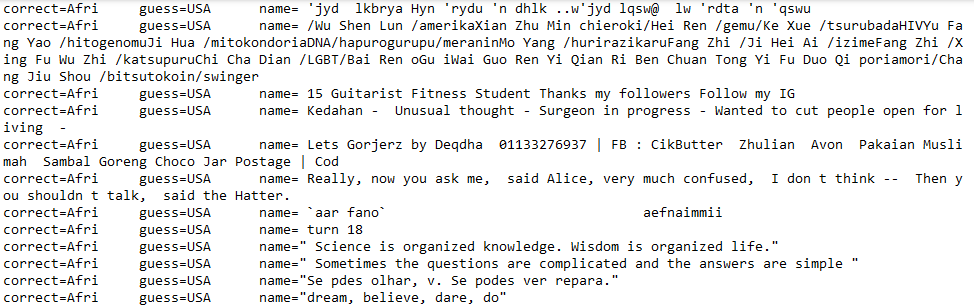

## Words Sources
The codes below are to find the source of the most informative features found above.

In [12]:
#Text1 is defined in the very top of this file
text1.concordance('Comedy')

Displaying 25 of 345 matches:
3632 Teriang , Pahang 8 150 Hiburan Comedy Teknologi Berita Sains & Teknologi 
eneral News World News Movies Music Comedy Photography Mr_lesungs Mr. Velly 79
ham 791881203628421120 10 170 Anime Comedy Movies Music Photography Science Te
rts & Culture General Entertainment Comedy habib_mallah1 Habib Mallah 79985042
, United Arab Emirates 20 70 Movies Comedy Photography Entertainment sahisopa 
ic Arts & Culture Food Movies Anime Comedy Travel Entertainment Sports World N
050192901 Dungun , Terengganu 13 91 Comedy Filem Berita Dunia Sukan Tempatan B
4945105920 Gombak , Selangor 25 407 Comedy Music Movies Arts & Culture Photogr
l`rby @ lmtHd @ 30 90 Entertainment Comedy Photography Faith & Religion aaw711
192565815345152 Sibu , Sarawak 2 93 Comedy Filem Muzik Sains & Teknologi Hibur
 General Entertainment Music Movies Comedy Anime Arts & Culture Food Travel Ph
mpat , Kelantan 24 99 Business News Comedy General News Local Sports Local Spo
538852865 Malacca , Ma

In [41]:
text1.concordance('ltknwlwjy') #coming from the websites, coding words. 

Displaying 25 of 164 matches:
. 815981029278314496 lshrq @ 2 101 ltknwlwjy l`lwm w ltknwlwjy l'khbr l`m @ lym
96 lshrq @ 2 101 ltknwlwjy l`lwm w ltknwlwjy l'khbr l`m @ lymn wldyn ltrfyh wai
l'khbr l'khbr l`m @ l'flm lrswmy @ ltknwlwjy ltrfyh ltSwyr lryDt lSHfywn l`lwm 
hbr l`lm lSHfywn kr @ lqdm l`lwm w ltknwlwjy ltknwlwjy jGUjDe9y30SID8X `ywn mh 
SHfywn kr @ lqdm l`lwm w ltknwlwjy ltknwlwjy jGUjDe9y30SID8X `ywn mh 7205449430
953 Morocco 45 174 mHtrf lhkr hack ltknwlwjy ltknwlwjy l`lwm w ltknwlwjy kholou
o 45 174 mHtrf lhkr hack ltknwlwjy ltknwlwjy l`lwm w ltknwlwjy kholoudamr8 khol
r hack ltknwlwjy ltknwlwjy l`lwm w ltknwlwjy kholoudamr8 kholoud amr 7970083489
9 l'khbr l`m @ l'khbr l'khbr l`m @ ltknwlwjy ltSwyr lryDt Joji15030718 Joji 760
 'flm 'khbr l`lwm 'khbr l`lm l`lwm ltknwlwjy ltSwyr lymn wldyn Solidpadu Fiz ( 
kwmydy lfnwn wlthqf @ l`lwm ltrfyh ltknwlwjy CharlesLutta4 Charles Lutta 245009
5087617 lmrt l`rby @ lmtHd @ 7 193 ltknwlwjy ltknwlwjy ltknwlwjy l'khbr l`m @ l
rt l`rby @

In [42]:
text1.concordance('Journalists') 

Displaying 25 of 165 matches:
Emirates 10 120 News General News Journalists World News Sports Soccer Basantk7
ch Magazine Coordinator , African Journalists Network for Agriculture ( AJNA ) 
ral News Business News World News Journalists General News News gay Business Ne
 Emirates 6 123 News General News Journalists World News Sports Soccer Soccer P
 2 120 General News Business News Journalists Sports World News World News Spor
he Nigeria Association of Science Journalists ( NASJ ) is made up of science an
tertainment General Entertainment Journalists World News Micothon Theo Straatho
747840 Johor Bahru , Johor 17 129 Journalists BakarAlim Abu Bakar Mohd Alim 819
79489 United Arab Emirates 13 237 Journalists News General News Journalists ras
237 Journalists News General News Journalists rashidsadaat Rashid Ahmad 8058182
 World News Movies Science Soccer Journalists Movies sureshaleti1 suresh aleti 
Emirates 20 240 News General News Journalists World News Sports World News Spor
 , United 

In [44]:
text1.concordance('Sains') 

Displaying 25 of 100 matches:
 150 Hiburan Comedy Teknologi Berita Sains & Teknologi alimmmjj ... .. 81598102
lif 753954176049131521 Malaysia 5 57 Sains Filem Muzik adhrb607 `dhr `bdwly 753
m Berita Dunia Sukan Tempatan Berita Sains Sains & Teknologi Anime Sukan Hibura
ta Dunia Sukan Tempatan Berita Sains Sains & Teknologi Anime Sukan Hiburan Jazz
bu , Sarawak 2 93 Comedy Filem Muzik Sains & Teknologi Hiburan Pelancongan Maka
iburan Pelancongan Makanan Teknologi Sains Nakkazi Esther Nakkazi 37880904 Ugan
unia Sukan Pemain Bola Sepak Hiburan Sains & Teknologi Berita Sains hazm5956 Ha
pak Hiburan Sains & Teknologi Berita Sains hazm5956 Haz Mi 766994498131890176 1
inabalu , Sabah 12 116 Hiburan Muzik Sains & Teknologi Berita Sains Comedy Hibu
buran Muzik Sains & Teknologi Berita Sains Comedy Hiburan Am Filem Hiburan Muzi
Hiburan Muzik Teknologi Anime Berita Sains Berita Sains Berita Sains clementtob
 Teknologi Anime Berita Sains Berita Sains Berita Sains clementtobiko clementto
ime Berita

## Lexical Dispersion 
Lexical Dispersion is one thing to automatically detect that a particular word occurs in a text, and to display some words that appear in the same context. However, we can also determine the location of a word in the text: how many words from the beginning it appears. [link](http://www.nltk.org/book/ch01.html). The lexical dispersion below shows the frequency of word types from the AfriScience magazine and the next one the frequency of words from the Society for Science & the Republic magazine. 

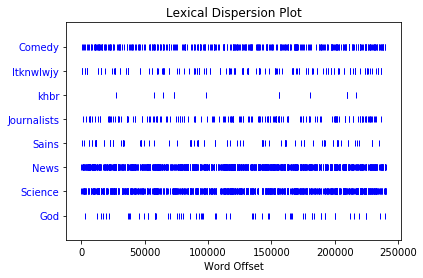

In [46]:
#Africa Science magazine lexical dispersion
text1.dispersion_plot(["Comedy", "ltknwlwjy", "khbr", "Journalists", "Sains", "News", "Science", "God"])

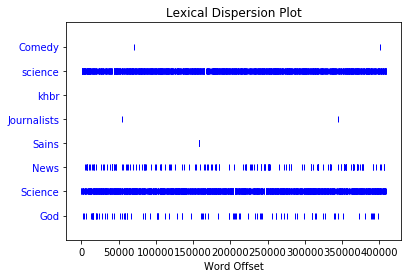

In [14]:
#Society for Science magazine lexical dispersion
text2.dispersion_plot(["Comedy", "science", "khbr", "Journalists", "Sains", "News", "Science", "God"])

In [19]:
text2.concordance('Sains') 

Displaying 6 of 6 matches:
 100705461 Malaysia 1109 371 Rencana sains & teknologi di Malaysia . Berminat m
Pusat Belajar & Konsultan Pendidikan Sains | Berkarya Mengukir Prestasi | Demo 
 | Berkarya Mengukir Prestasi | Demo Sains , Ekskul Sains , Workshop Sains , Ou
gukir Prestasi | Demo Sains , Ekskul Sains , Workshop Sains , Outing Sains , dl
Demo Sains , Ekskul Sains , Workshop Sains , Outing Sains , dll . | Kontak : 08
skul Sains , Workshop Sains , Outing Sains , dll . | Kontak : 085721801275 Solo


In [138]:
text2.concordance('Ban') #middle name

Displaying 5 of 5 matches:
nce and Societies TheBiggerBan Steven Ban 2545058666 10 37 ammarshadiq Ammar Sh
manity better itself . aspeed Krampus Ban All Nazis Pamphlet 14156602 In the cr
 takafumi24d JUN 4732670839 Ri Ben Da Ban 232 356 RitsSheng Ming Ying Hua 2Hui 
 Xing Jun deitsupaida } gaZhao Ri Chu Ban She sanyoriFa Mai Zhong . yoroshikuoY
41769967 6 51 islandgirlmandy kimesha Ban 97680139 51 407 jwhite4833 jerry whit


In [139]:
text1.concordance('Ban') #middle name

Displaying 25 of 26 matches:
saka , JPN , Asia , Earth 474 2322 Da Ban Sheng mare , Da Ban Yu chi , Quan Hao
Earth 474 2322 Da Ban Sheng mare , Da Ban Yu chi , Quan Hao ki , satsukaHao ki 
Qiu Zhuan Yong Gou . Gao Xiao Sheng . Ban Shen huandenchihanashi . Ruo Shou haQ
n 801017263369224193 9 80 Dong Man Yi Ban Xin Wen Guo Ji Xin Wen Yu Le Yi Shu Y
87712944128 Pinang , Malaysia 6 96 Yi Ban Xin Wen Guo Ji Xin Wen Shang Ye Xin W
826276507463020544 Malaysia 25 506 Yi Ban Yu Le Yi Ban Yu Le Yi Ban Yu Le Yi Ba
20544 Malaysia 25 506 Yi Ban Yu Le Yi Ban Yu Le Yi Ban Yu Le Yi Ban Yu Le Yi Ba
a 25 506 Yi Ban Yu Le Yi Ban Yu Le Yi Ban Yu Le Yi Ban Yu Le Yi Ban Xin Wen Fai
an Yu Le Yi Ban Yu Le Yi Ban Yu Le Yi Ban Yu Le Yi Ban Xin Wen FaisalF09403695 
an Yu Le Yi Ban Yu Le Yi Ban Yu Le Yi Ban Xin Wen FaisalF09403695 Faisal Fai 82
 Lee 818899213845233665 UAE 12 127 Yi Ban Xin Wen Guo Ji Xin Wen Lu You She Yin
94753 0 108 beatrice_godeau zeruChuan Ban Shen Ye nooHui Miao ki60Fen Yi Ben Sh
vy ivy HOe 

## Findings
The characters are different when the words are non-English words. For example, the word "Journalists" is in sentences that are more formal and informative about different news channels in Africa and in the Emirates. However, the other top words "Comedy", "ltknwlwjy", "Sains" are in sentence that have unusual characters, misspelled words, and repetitve sentences. For example, technolgy is spelled as Teknologi and go along with the words Sains. For these reasons, some of the sentences are suspuscious, leading the steps below to know more about the followers of AfriScience magazine. The objective is to find which followers are real users and which ones are bots. 

## What I was hoping to do but did not get to:

I was hoping to do a visualization of the ratio of friends to followers in Python but did not succeed to do so. I did in excel instead, which I included in the write up (Figure 4), and also pasted a screenshot of it here: 
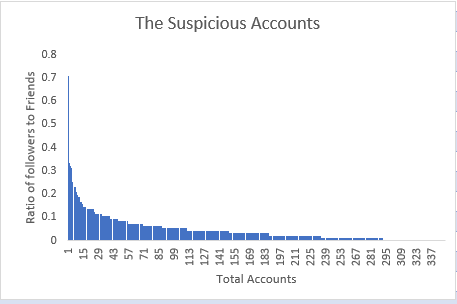

Figure 4 presents statistics of ratio of followers to friends (# of followers / # of friends in Excel). The graph shows that there are more than 300 accounts from Africa Science followers that have 0 friends following them back, also known as bots. (see the write up in pdf format in this folder to know more about this section).

# Conclusion
Using a Naïve Bayes classifier to analyze Twitter API data from Africa Science News and the Society for Science provides informative insights on word patterns that are typical to each magazine. Moreover, the frequency and context of word usages can be helpful to know the nature of Twitter subscribers, whether real account or bots. 